# Backprogation in NeuralNetworks
> A code first tutorial to compute backpropagation from scratch in python using numpy.

- toc: false
- badges: true
- comments: true
- categories: [deeplearning python3.x numpy]
- image: images/backprop.jpeg

As the Title suggets in this blog post I would try to tackle `backpropagation in neural networks`.
We will be using `numpy` for our calculations for this particular post. 

I will assume that you all know what a artificial neural network is and have a little bit of knowledge about `forward and backward propagation`. Just having a simple idea is enough.

If you do not know what the above terms are or would like to brush up on the topics , I would suggest this amazing [youtube playlist by 3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi).

> youtube: https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

## Setting up Imports:

In [46]:
import numpy as np
import gzip
import pickle
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(123)
%matplotlib inline

## Preparing the data

For this blog post, we'll use one of the most famous datasets in computer vision, [MNIST](https://en.wikipedia.org/wiki/MNIST_database). MNIST contains images of handwritten digits, collected by the National Institute of Standards and Technology and collated into a machine learning dataset by Yann Lecun and his colleagues. Lecun used MNIST in 1998 in [Lenet-5](http://yann.lecun.com/exdb/lenet/), the first computer system to demonstrate practically useful recognition of handwritten digit sequences. This was one of the most important breakthroughs in the history of AI.

Run the code below to download the `MNIST` dataset. The dataset will be downloaded to the path `../../Datasets/` or you can modify the path as you like.

In [ ]:
!wget -P "../../Datasets/" http://deeplearning.net/data/mnist/mnist.pkl.gz

In [3]:
def get_data(path):
    """
    Fn to unzip the MNIST data and return
    the data as numpy arrays
    """
    with gzip.open(path, 'rb') as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')
    return map(np.array, (x_train,y_train,x_valid,y_valid))

In [4]:
x_train,y_train,x_valid,y_valid = get_data(path= "../../Datasets/mnist.pkl.gz")

In [5]:
tots,feats = x_train.shape
print("Shape of x_train:",x_train.shape)
print("Total number of examples:", tots)
print("Number of pixel values per image:", feats)

Shape of x_train: (50000, 784)
Total number of examples: 50000
Number of pixel values per image: 784


Let's view one image from our dataset:

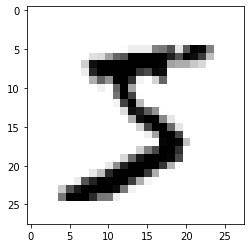

In [7]:
plt.imshow(x_train[0].reshape(28,28), cmap="binary");

## Basic Model Architecture

For this task we are going to use a very basic model architecture this 2 linear layers and a output layer with 10 outputs.

In [8]:
#hide_input
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"' + s + '; }')

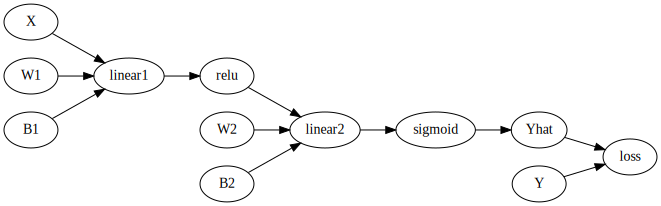

In [45]:
#hide_input
gv('''
X->linear1->relu->linear2->sigmoid->Yhat->loss
W1->linear1
B1->linear1
W2->linear2
B2->linear2
Y->loss
''')

## Let's take a deep dive into what this network means:

Let's take at look at all the individual components of this network:
- **Linear:**
  The linear layer computes the following :      
   ```python
   out = matmul(input,W1) + B1
   ```
   
- **ReLU:** 
  The relu computes the following:
  ```python
  out = max(0, input)
  ```
- **Sigmoid:** 
  The sigmoid computes the following:
  ```python
  out = 1/(1 + e.pow(input))
  ```
  
- **Loss:** 
  For the loss we are going to use the CrossEntropy Loss
  ```python
  out = 
  ```

**Now that we have our model architecture, let's create the different parts needed to assemble the model:**
- linear layer
- relu activation
- sigmoid activation
- loss

**Before moving forward let's us creat a special class that will store the parameters and the gradients of the parameters. These gradients will later help us in the backward pass.**

In [117]:
class Tensor:
    """
    A modified numpy array, This class stores the numpy array at the 
    `.val` attribute of the class and the `.grad` attribute stores the gradients 
    of that value
    """
    def __init__(self, array: np.array):
        self.val = array
        self.grad = None # store gradients 
        
    def __call__(self):
        return self.val

## The Linear Layer

### Forward Propagation

In this step the outputs are calculated.

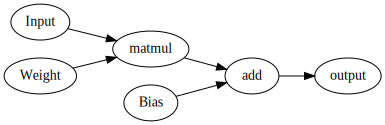

In [243]:
#hide_input
gv('''
Input->matmul->add->output
Weight->matmul
Bias->add
''')

## Backward Propagation:

In this step the gradients of the output wrt to the inputs, weights and bias are calculated.

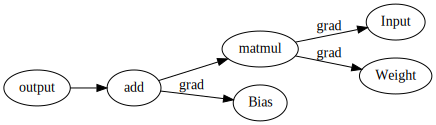

In [242]:
#hide_input
gv('''
output->add->matmul
matmul->Input[label=grad]
matmul->Weight[label=grad]
add->Bias[label=grad]
''')

In [215]:
class Linear():
    """
    Creates a Linear dense layer
    """
    def __init__(self, w: Tensor, b: Tensor):
        self.w = w
        self.b = n
    
    def __call__(self, x:Tensor):
        "forward propagation step"
        self.input = x # store the input 
        # compute matmul
        matmul = self.input()@self.w()
        # compute addition with bias and convert to Tensor
        self.output = Tensor(matmul + self.b()) # store the ouput
        return self.output
        
    def backward(self):
        """
        The backward propagation step. This step claculates the gradients
        of the paramters of the layer wrt to the loss generated in the 
        forward step and stores them in the `.grad` attributes of the parameters.
        """
        # compute gradient of the input wrt to the output
        self.input.grad = self.output.grad @ self.w().transpose()
        # compute gradint of the weight wrt to the output
        self.w.grad = self.input().transpose() @ self.output.grad
        # compute the gradient of the bias wrt to the output
        self.b.grad = np.sum(self.output.grad, axis=0, keepdims=True)

In [216]:
lin1 = Linear(input_dims=x_train.shape[1], output_dims=16)

In [217]:
output = lin1(Tensor(x_train))

In [218]:
output.grad = output() - 1

In [219]:
lin1.backward()

In [220]:
lin1.w().shape, lin1.w.grad.shape

((784, 16), (784, 16))

In [214]:
lin1.b().shape, lin1.b.grad.shape

((1, 16), (1, 16))